## 1.Import the necessary libraries.

In [97]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

#For date-time
import math
from datetime import datetime
from datetime import timedelta


import warnings
warnings.filterwarnings("ignore")

## 2. Load time series data.

In [98]:
import zipfile

zip_file_path = 'walmart.zip'
destination_folder = 'walmart_dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

csv_files = ['features.csv', 'stores.csv', 'test.csv', 'train.csv']

df_features, df_stores, df_test, df_train = [pd.read_csv(f'{destination_folder}/{csv_file}') for csv_file in csv_files]

In [99]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [100]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [101]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [102]:
df_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


## 3. Merging df_train, df_features and df_stores

In [103]:
df = df_train.merge(df_features, how='inner').merge(df_stores, how='inner')

In [104]:
df.shape

(421570, 16)

In [105]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [106]:
df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421569,45,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


The data covers the period from <span style="color:red">**05/02/2010**</span> to <span style="color:red">**26/10/2012**</span>.

In [107]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


There's a problem with <span style="color:blue">**Weekly_Sales**</span> data. It can't have negative values!

## 4. Null values check

In [108]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [109]:
# Filling null data with "0"
df = df.fillna(0)

In [110]:
df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

## 5. Deleting wrong sales data

In [111]:
df = df.loc[df['Weekly_Sales'] > 0]

In [112]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,44.241309,16033.114591,60.090599,3.360890,2590.323565,878.905242,468.845949,1083.534361,1662.805002,171.212496,7.960000,136749.732787
std,12.787236,30.508819,22729.492116,18.447857,0.458519,6053.415601,5076.928566,5534.069859,3896.068938,4206.209357,39.162445,1.863879,60993.084568
min,1.000000,1.000000,0.010000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2120.130000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7661.700000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20271.265000,74.280000,3.738000,2809.050000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [113]:
df.shape

(420212, 16)

## 6. Boolean column "IsHoliday"

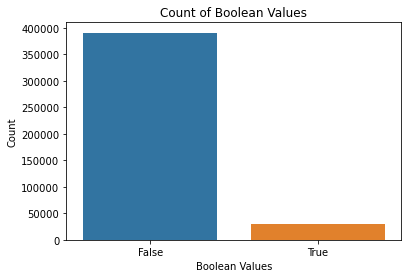

In [114]:
sns.countplot(x='IsHoliday', data=df)
plt.title('Count of Boolean Values')
plt.xlabel('Boolean Values')
plt.ylabel('Count')
plt.show()

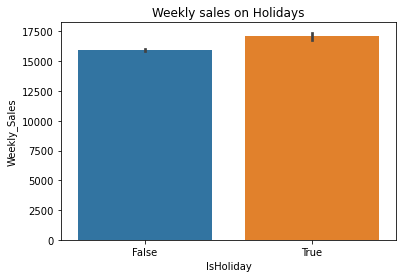

In [115]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)
plt.title('Weekly sales on Holidays')
plt.show()

In [116]:
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique() 

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

The holidays mentioned in the data are:

- **Super Bowl**: 12-02-2010, 11-02-2011, 10-02-2012, 08-02-2013

- **Related to Labor Day**: 10-09-2010, 09-09-2011, 07-09-2012, 06-09-2013

- **Thanksgiving**: 26-11-2010, 25-11-2011, 23-11-2012, 29-11-2013

- **Christmas**: 30-12-2011, 28-12-2012, 27-12-2013

- **New Year's Eve**: 31-12-2010 

## 7. Categorical data

In [117]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420212 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420212 non-null  int64  
 1   Dept          420212 non-null  int64  
 2   Date          420212 non-null  object 
 3   Weekly_Sales  420212 non-null  float64
 4   IsHoliday     420212 non-null  bool   
 5   Temperature   420212 non-null  float64
 6   Fuel_Price    420212 non-null  float64
 7   MarkDown1     420212 non-null  float64
 8   MarkDown2     420212 non-null  float64
 9   MarkDown3     420212 non-null  float64
 10  MarkDown4     420212 non-null  float64
 11  MarkDown5     420212 non-null  float64
 12  CPI           420212 non-null  float64
 13  Unemployment  420212 non-null  float64
 14  Type          420212 non-null  object 
 15  Size          420212 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 67.8+ MB


In [119]:
for i in ['Store', 'Dept', 'Type']:
    print(f'Number of {i} is: {df[i].nunique()}')

Number of Store is: 45
Number of Dept is: 81
Number of Type is: 3


#### a. Sales per stores

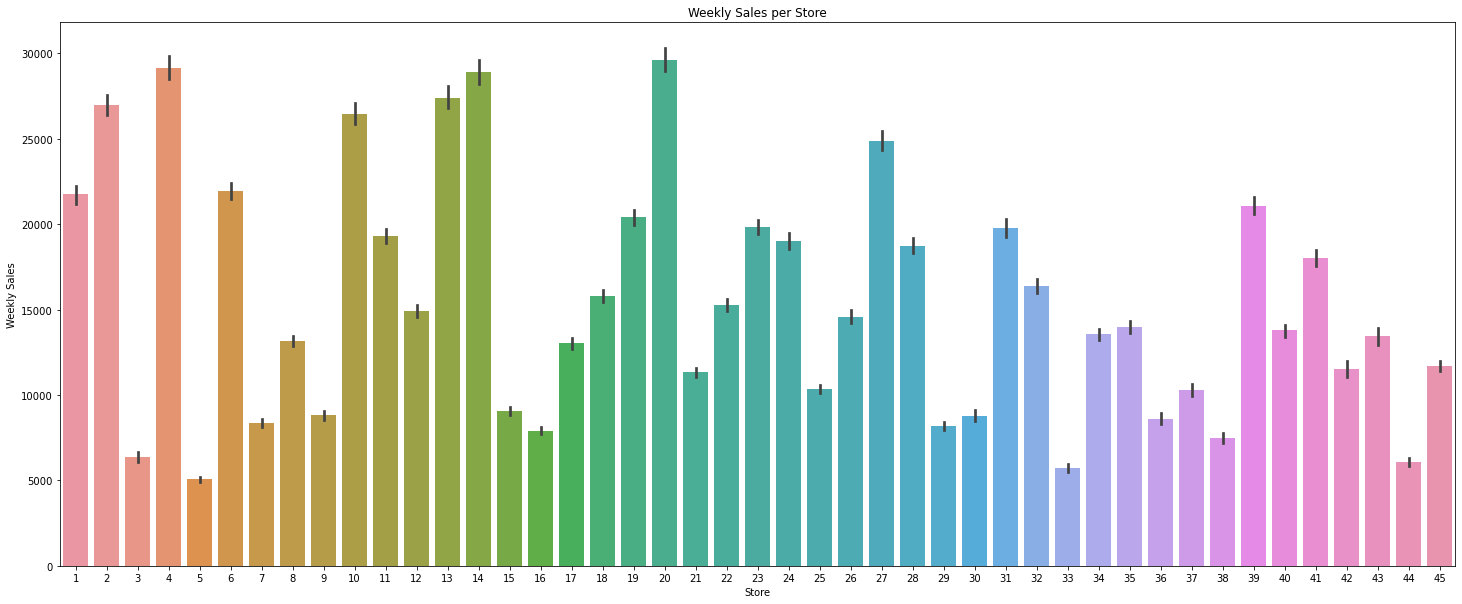

In [120]:
plt.figure(figsize=(25, 10))
sns.barplot(x='Store', y='Weekly_Sales', data=df)
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales per Store')
plt.show()

In [125]:
top5_stores = df.groupby('Store')['Weekly_Sales'].sum().nlargest(5)
top5_stores = top5_stores.sort_values(ascending=False)
print(f'Top 5 stores with the highest Weekly Sales: {top5_stores}')

Top 5 stores with the highest Weekly Sales: Store
20    3.014014e+08
4     2.995453e+08
14    2.890019e+08
13    2.865180e+08
2     2.753872e+08
Name: Weekly_Sales, dtype: float64


<span style = 'color:red'>The top 5 stores</span> that have the highest sales are: 20, 4, 14, 13 and 2.

#### b. Sales per Departments 

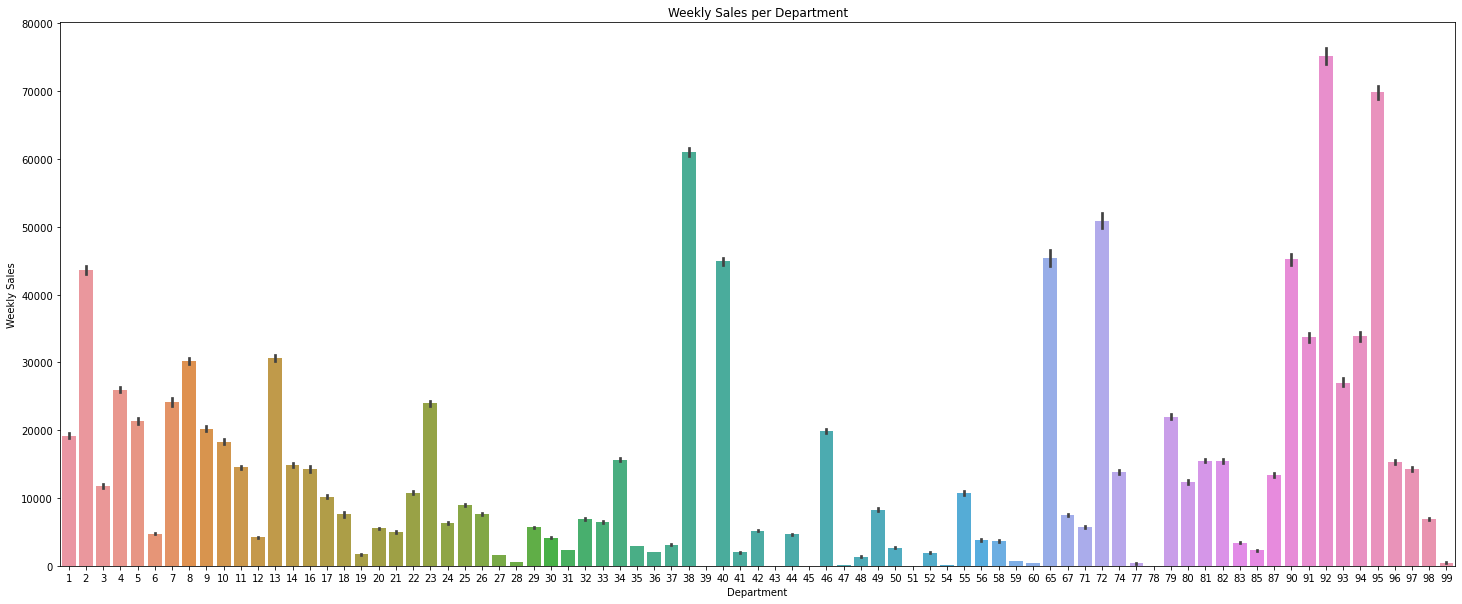

In [123]:
plt.figure(figsize=(25, 10))
sns.barplot(x='Dept', y='Weekly_Sales', data=df)
plt.xlabel('Department')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales per Department')
plt.show()

In [128]:
top10_dept = df.groupby('Dept')['Weekly_Sales'].sum().nlargest(10)
top10_dept = top10_dept.sort_values(ascending=False)
print(f'Top 10 stores with the highest Weekly Sales:{top10_dept}')

Top 10 stores with the highest Weekly Sales:Dept
92    4.839433e+08
95    4.493202e+08
38    3.931181e+08
72    3.057282e+08
90    2.910685e+08
40    2.889360e+08
2     2.806112e+08
91    2.167817e+08
13    1.973216e+08
8     1.942808e+08
Name: Weekly_Sales, dtype: float64


<span style ='color:red'>The top 10 departments</span> that have the highest weekly sales are: 92, 95, 38, 72, 90, 40, 2, 91, 13 and 8.

#### c. Sales per store types 

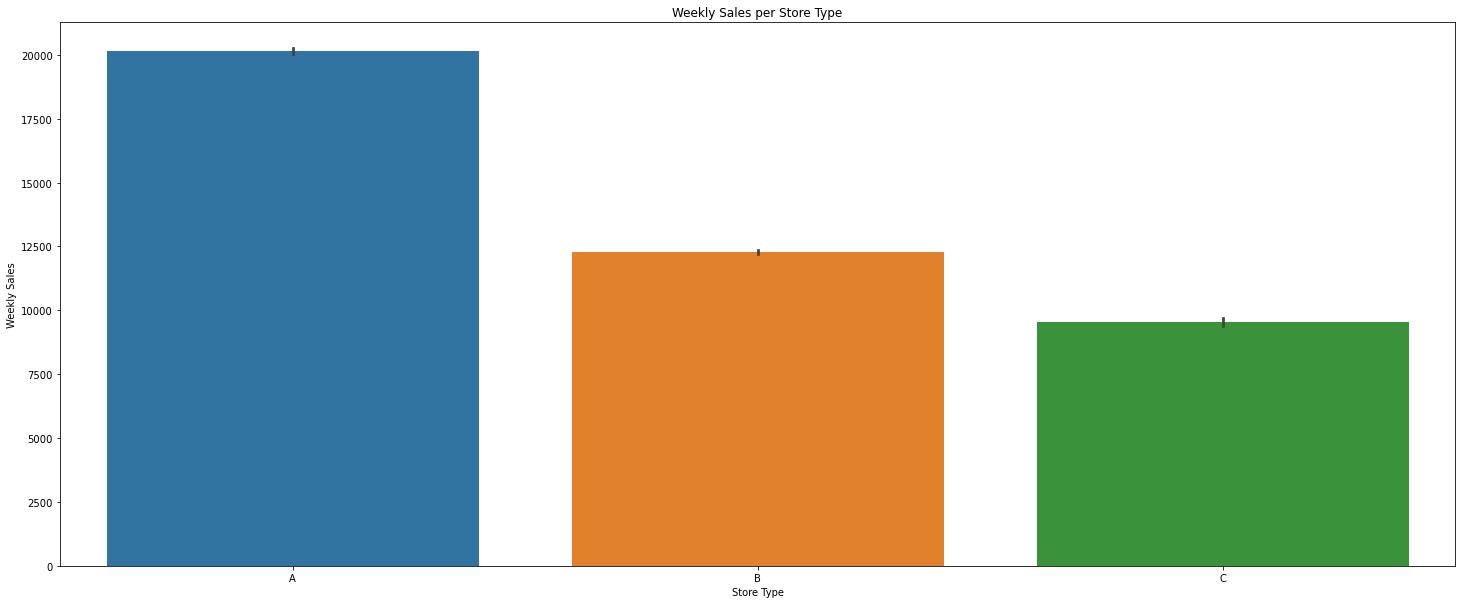

In [129]:
plt.figure(figsize=(25, 10))
sns.barplot(x='Type', y='Weekly_Sales', data=df)
plt.xlabel('Store Type')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales per Store Type')
plt.show()

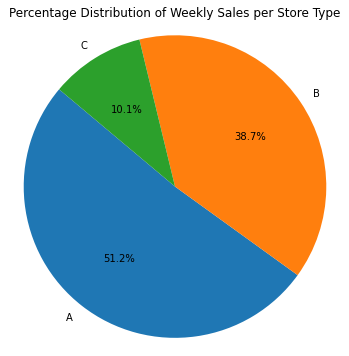

In [130]:
plt.figure(figsize=(6, 6))
plt.pie(df['Type'].value_counts(), labels= df['Type'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Weekly Sales per Store Type')
plt.axis('equal')  
plt.show()

Half of the stores have <span style='color:red'>**Type A**</span>!

#### d. Store Type and Store Size

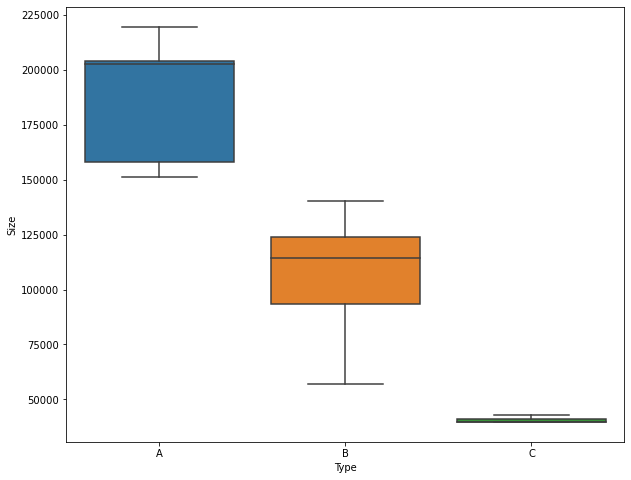

In [150]:
plt.figure(figsize=(10,8))
fig = sns.boxplot(x='Type', y='Size', data=df, showfliers=False)

<span style = 'color:red'> --> </span> We notice that as the store size expands, the sales also tend to increase.

## 8. Temperature, Fuel Price, CPI and Unemployment 

#### a. Temperature

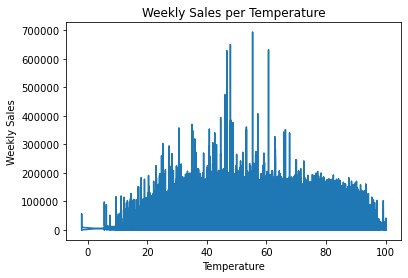

In [131]:
plt.plot(df['Temperature'], df['Weekly_Sales'])
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales per Temperature')
plt.show()

<AxesSubplot:xlabel='Temperature'>

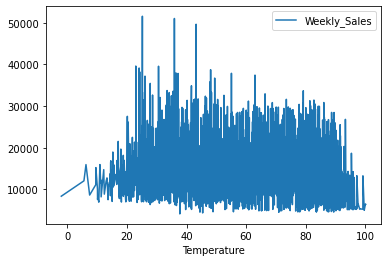

In [132]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Temperature")
fuel_price.plot()

#### b. Fuel Price 

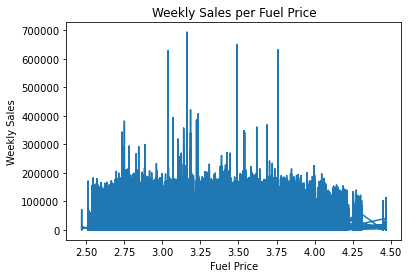

In [133]:
plt.plot(df['Fuel_Price'], df['Weekly_Sales'])
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales per Fuel Price')
plt.show()

<AxesSubplot:xlabel='Fuel_Price'>

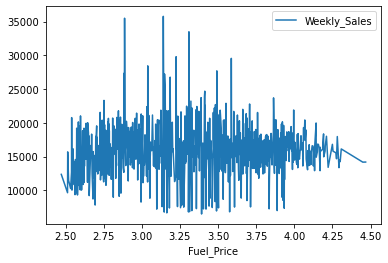

In [134]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

#### c. CPI 

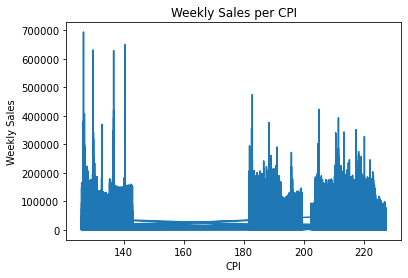

In [135]:
plt.plot(df['CPI'], df['Weekly_Sales'])
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales per CPI')
plt.show()

<AxesSubplot:xlabel='CPI'>

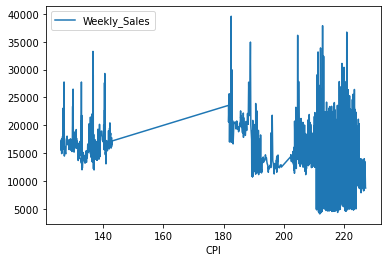

In [136]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
fuel_price.plot()

No data has a CPI between 142 and 180.

#### d. Unemployment 

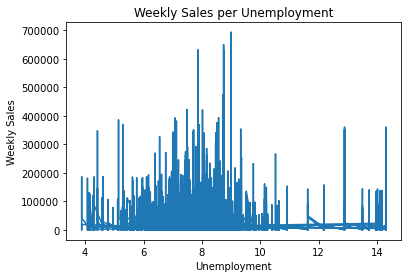

In [137]:
plt.plot(df['Unemployment'], df['Weekly_Sales'])
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales per Unemployment')
plt.show()

<AxesSubplot:xlabel='Unemployment'>

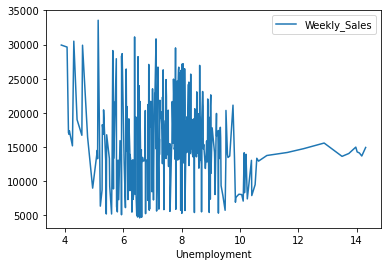

In [138]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Unemployment")
fuel_price.plot()

## 9. Correlation 

[]

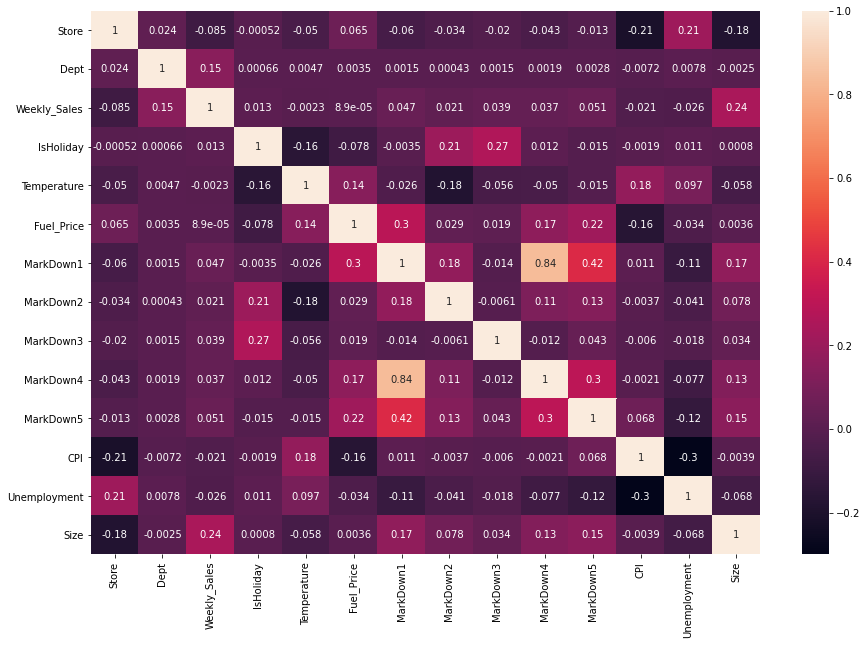

In [139]:
# Plotting correlation between all important features
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

Temperature, Fuel Price, CPI and Unemployment have no significant effect on Weekly_sales. So I'll drop them. Also, Markdown 4 and Markdwon 5 are very correlated to Markdown 1. So I'll drop them too. 

In [140]:
df.drop(['Temperature','CPI','Fuel_Price','Unemployment','MarkDown4','MarkDown5'], axis=1, inplace=True)

## 10. Convert Date to datetime

In [141]:
df["Date"] = pd.to_datetime(df["Date"]) 
df['week'] =df['Date'].dt.week
df['month'] =df['Date'].dt.month 
df['year'] =df['Date'].dt.year

In [142]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,MarkDown1,MarkDown2,MarkDown3,Type,Size,week,month,year
0,1,1,2010-02-05,24924.50,False,0.0,0.0,0.0,A,151315,5,2,2010
1,1,2,2010-02-05,50605.27,False,0.0,0.0,0.0,A,151315,5,2,2010
2,1,3,2010-02-05,13740.12,False,0.0,0.0,0.0,A,151315,5,2,2010
3,1,4,2010-02-05,39954.04,False,0.0,0.0,0.0,A,151315,5,2,2010
4,1,5,2010-02-05,32229.38,False,0.0,0.0,0.0,A,151315,5,2,2010


<AxesSubplot:xlabel='year', ylabel='Weekly_Sales'>

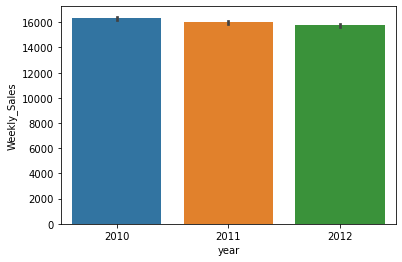

In [143]:
sns.barplot(x='year', y='Weekly_Sales', data=df)

<AxesSubplot:xlabel='month', ylabel='Weekly_Sales'>

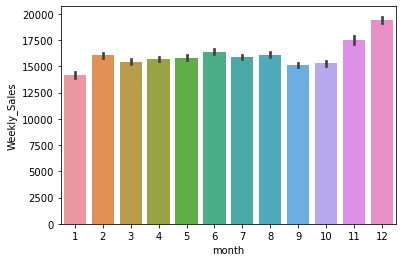

In [144]:
sns.barplot(x='month', y='Weekly_Sales', data=df)

<span style = 'color:red'> --> </span> The highest sales are in <span style = 'color:red'>December</span> and <span style = 'color:red'>November</span>! 

<AxesSubplot:xlabel='week', ylabel='Weekly_Sales'>

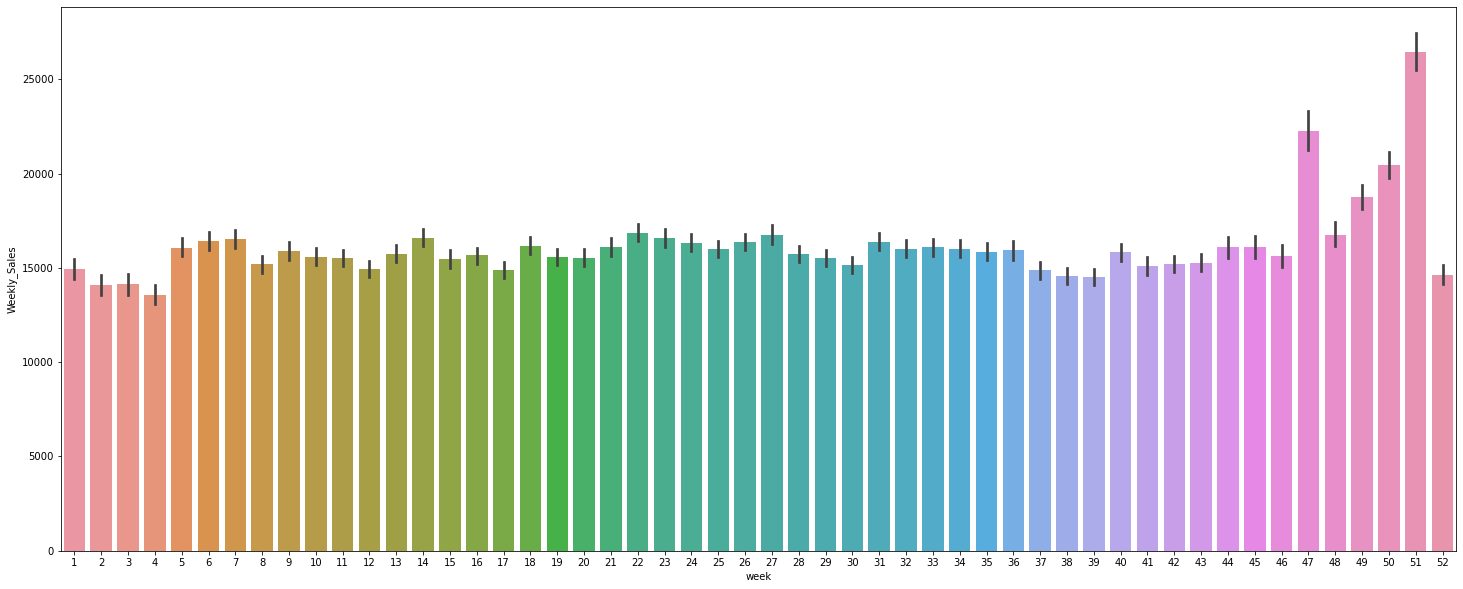

In [145]:
plt.figure(figsize=(25, 10))
sns.barplot(x='week', y='Weekly_Sales', data=df)

<span style = 'color:red'> --> </span> The weeks with the highest sales are the <span style = 'color:red'>51th</span> and <span style = 'color:red'>47th</span> due to Christmas and Thanksgiving holidays!

<AxesSubplot:xlabel='month'>

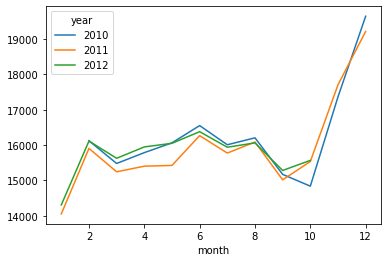

In [146]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

<AxesSubplot:xlabel='week'>

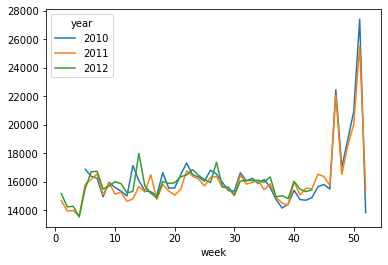

In [147]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

<span style = 'color:red'> --> </span> We notice that 2011 has generally lower sales than 2010 and 2012. 
Except that for 2012, we don't have the weekly sales data of November and December.  

## 11. Data Encoding 

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420212 entries, 0 to 421569
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Dept          420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   IsHoliday     420212 non-null  bool          
 5   MarkDown1     420212 non-null  float64       
 6   MarkDown2     420212 non-null  float64       
 7   MarkDown3     420212 non-null  float64       
 8   Type          420212 non-null  object        
 9   Size          420212 non-null  int64         
 10  week          420212 non-null  int64         
 11  month         420212 non-null  int64         
 12  year          420212 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(4), int64(6), object(1)
memory usage: 58.2+ MB


In [156]:
df_encoded = df.copy()
df_encoded['Type'] = df_encoded['Type'].replace({'A':1, 'B': 2, 'C': 3})
df_encoded['IsHoliday'] = df_encoded['IsHoliday'].astype(bool).astype(int)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420212 entries, 0 to 421569
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Dept          420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   IsHoliday     420212 non-null  int32         
 5   MarkDown1     420212 non-null  float64       
 6   MarkDown2     420212 non-null  float64       
 7   MarkDown3     420212 non-null  float64       
 8   Type          420212 non-null  int64         
 9   Size          420212 non-null  int64         
 10  week          420212 non-null  int64         
 11  month         420212 non-null  int64         
 12  year          420212 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(7)
memory usage: 59.4 MB


# Findings

- The dataset contains Walmart sales data of the period from 05/02/2010 to 26/10/2012.
- The holidays mentioned in the data are: Super Bowl, Thanksgiving, Christmas, New Year's Eve and Labor Day.
- There are 45 stores, 81 department and 3 types of stores (A, B and C) in this dataset.
- The top 5 stores that have the highest sales are: 20, 4, 14, 13 and 2.
- The top 10 departments that have the highest weekly sales are: 92, 95, 38, 72, 90, 40, 2, 91, 13 and 8.
- Half of the stores have Type A.
- As the store size expands, the sales also tend to increase.
- Temperature, Fuel Price, CPI and Unemployment have no significant effect on sales.
- The highest sales are in December and November!
- The weeks with the highest sales are the 51th and 47th due to Christmas and Thanksgiving holidays!
- 2011 has generally lower sales than 2010 and 2012. Except that for 2012, we don't have the weekly sales data of November and December.

In [157]:
df_encoded.to_csv('clean_walmart_data.csv')